# Import Data from Web

## 웹 저장소에 있는 flat file 가져오기

In [1]:
from urllib.request import urlretrieve
import pandas as pd

In [11]:
# 레드 와인의 물리화학적 성분과 품질 등급 : University of California, Irvine
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

로컬에 파일로 저장한 후 데이터 읽기

In [5]:
urlretrieve(url, 'data/winequality-red.csv')

('data/winequality-red.csv', <http.client.HTTPMessage at 0x1159e6a90>)

In [6]:
df = pd.read_csv('data/winequality-red.csv', sep=';')  # 로컬 파일 읽기
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


파일을 로컬로 저장하지 않고 웹에서 바로 데이터프레임으로 읽기

In [14]:
df2 = pd.read_csv(url, sep=';')
df2.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

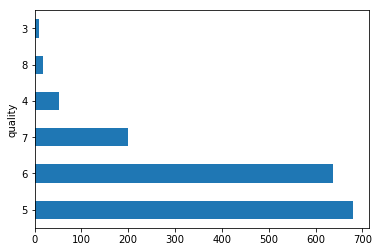

In [39]:
df['quality'].value_counts().plot(kind='barh')
plt.ylabel('quality')

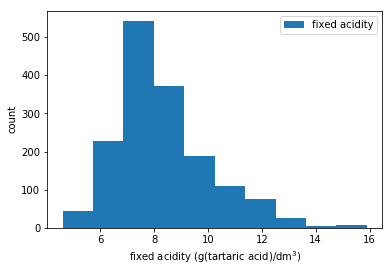

In [35]:
df.ix[:, 0:1].plot(kind='hist')
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')

## 웹 저장소에 있는 excel file 가져오기

In [36]:
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

In [37]:
xl = pd.read_excel(url, sheetname=None)  # all sheets

xl.keys()   # sheet names

dict_keys(['1900', '1700'])

In [38]:
xl['1700'].head()

,country,1700
0,Afghanistan,34.565000
1,Akrotiri and Dhekelia,34.616667
2,Albania,41.312000
3,Algeria,36.720000
4,American Samoa,-14.307000


## HTTP requests : urllib

In [40]:
from urllib.request import urlopen, Request

In [45]:
url = "http://www.datacamp.com/teach/documentation"

request = Request(url)
response = urlopen(request)   # Send request and catch response
print(type(response))

<class 'http.client.HTTPResponse'>


In [46]:
# response 출력
html = response.read()
html

b'<!DOCTYPE html>\n<html>\n\t<head>\n\n\t\t<link rel="stylesheet" media="all" href="/teach/assets/application-d3632e0a08527d3a646ff39915da6d69.css" />\n\t\t<link rel="shortcut icon" type="image/x-icon" href="/teach/assets/favicon-5b50d893ea0894bf9de48997dcc2e11b.ico" />\n\t\t<meta name="csrf-param" content="authenticity_token" />\n<meta name="csrf-token" content="y+Xe/B6UjYyKfxF72Siwu8oyu+3RHSdYWiby7xSSjsIVqawfcFLJIHnwqtbQIxfJiwPNXngeVa0kfKmtNR3Iiw==" />\n\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"4795905ee2","applicationID":"13547831","transactionName":"JlkNEEQLVA0DE0wVFwRCCgdpFFkGAxJMAgwGQw4BWBBZFQ8ODQ==","queueTime":0,"applicationTime":36,"agent":""}</script>\n<script type="text/javascript">window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var o=n[t]={exports:{}};e[t][0].call(o.exports,func

In [42]:
response.close()

## HTTP requests : requests

In [47]:
import requests

In [48]:
url = "http://www.datacamp.com/teach/documentation"

r = requests.get(url)

text = r.text
text

'<!DOCTYPE html>\n<html>\n\t<head>\n\n\t\t<link rel="stylesheet" media="all" href="/teach/assets/application-d3632e0a08527d3a646ff39915da6d69.css" />\n\t\t<link rel="shortcut icon" type="image/x-icon" href="/teach/assets/favicon-5b50d893ea0894bf9de48997dcc2e11b.ico" />\n\t\t<meta name="csrf-param" content="authenticity_token" />\n<meta name="csrf-token" content="bV8aVu5v1na5JZ+3NE5oY4RUv65kgPDB5Ygersmd2J4BhucoInx/5zHpJ5i40UbMnL70kLai6rT9A4MbB8YWIw==" />\n\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"4795905ee2","applicationID":"13547831","transactionName":"JlkNEEQLVA0DE0wVFwRCCgdpFFkGAxJMAgwGQw4BWBBZFQ8ODQ==","queueTime":0,"applicationTime":60,"agent":""}</script>\n<script type="text/javascript">window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var o=n[t]={exports:{}};e[t][0].call(o.exports,funct

## BeautifulSoup : HTML parsing

In [53]:
import requests
from bs4 import BeautifulSoup

In [67]:
url = 'http://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=101&sid2=259'
#url = 'https://www.python.org/~guido/'
r = requests.get(url)
html_doc = r.text

In [68]:
# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html_doc, "lxml")
pretty_soup = soup.prettify()
pretty_soup

'<!DOCTYPE HTML>\n<html lang="ko">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="600" http-equiv="refresh"/>\n  <meta content="width=1023" name="viewport"/>\n  <meta content="경제 금융 : 네이버뉴스" property="og:title"/>\n  <meta content="website" property="og:type"/>\n  <meta content="http://news.naver.com/main/list.nhn?mode=LS2D&amp;mid=shm&amp;sid1=101&amp;sid2=259" property="og:url"/>\n  <meta content="http://static.news.naver.net/image/news/ogtag/navernews_200x200_20160804.png" property="og:image"/>\n  <meta content="각 언론사별 금융 기사 제공" property="og:description"/>\n  <meta content="summary" name="twitter:card"/>\n  <meta content="경제 금융 : 네이버뉴스" name="twitter:title"/>\n  <meta content="네이버 뉴스" name="twitter:site"/>\n  <meta content="네이버 뉴스" name="twitter:creator"/>\n  <meta content="http://static.news.naver.net/image/news/ogtag/navernews_200x200_20160804.png" name="twitter:image"/>\n  <meta content="각 언론사별 금융 기사 제공" name="twitte

In [69]:
page_title = soup.title
page_title

<title>경제 : 네이버 뉴스	</title>

In [89]:
# Find all 'a' tags
a_tags = soup.find_all('a')

for link in a_tags:
    print(link.get('href'))
    print(link.get('title'))

#lnb
None
#snb
None
#main_content
None
http://www.naver.com/
None
http://news.naver.com/
None
/main/election/president2017/index.nhn
None
http://entertain.naver.com/home
None
http://sports.news.naver.com
None
http://newsstand.naver.com
None
http://weather.naver.com
None
/main/home.nhn
None
/main/list.nhn?mode=LSD&mid=sec&sid1=001
None
/main/main.nhn?mode=LSD&mid=shm&sid1=100
None
/main/main.nhn?mode=LSD&mid=shm&sid1=101
None
/main/main.nhn?mode=LSD&mid=shm&sid1=102
None
/main/main.nhn?mode=LSD&mid=shm&sid1=103
None
/main/main.nhn?mode=LSD&mid=shm&sid1=104
None
/main/main.nhn?mode=LSD&mid=shm&sid1=105
None
/main/opinion/home.nhn
None
/main/photo/index.nhn?mid=pho
None
/main/tv/index.nhn?mid=tvh
None
/main/ranking/popularDay.nhn?mid=etc&sid1=111
None
http://weather.naver.com/rgn/cityWetrCity.nhn?cityRgnCd=CT001013
None
http://weather.naver.com/rgn/cityWetrCity.nhn?cityRgnCd=CT001028
None
http://weather.naver.com/rgn/cityWetrCity.nhn?cityRgnCd=CT001015
None
http://weather.naver.com/rgn/ci

[]